In [46]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
df_w_audio_ft=pd.read_csv('df_playlists.csv')

In [48]:
audio_ft=pd.read_csv('df_features.csv')

In [49]:
audio_df= audio_ft.select_dtypes(include=['number'])

In [51]:
scaler = StandardScaler()

playlist_scaled = scaler.fit_transform(audio_df)

df_scaled_playlist = pd.DataFrame(playlist_scaled)
df_scaled_playlist

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.024825,0.351770,0.189817,0.880288,-1.300431,-0.551543,-0.019382,-0.560688,-0.476551,1.585416,-0.388489,-0.825327,-7.819060
1,1.395026,-0.216829,-0.092348,0.670157,-1.300431,-0.315583,-0.682623,-0.560683,-0.316719,0.905080,0.039737,-0.179691,0.205426
2,1.241250,0.445908,-1.221009,0.349706,0.768976,-0.345493,-0.194635,-0.560424,-0.543148,1.502832,-0.103647,-0.133890,0.205426
3,-0.051605,-0.133987,1.036312,0.684643,0.768976,-0.531602,-0.191614,-0.560629,-0.543148,-0.781999,1.354862,-0.169700,-2.469403
4,-0.062995,-0.333561,-0.092348,0.235407,0.768976,0.557357,-0.366866,-0.560688,-0.503190,-0.192111,0.751951,-0.243642,0.205426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,-1.036908,-1.726815,-0.938844,-1.604358,0.768976,-0.452949,1.869117,-0.012178,0.961945,0.240473,-1.638910,1.452525,2.880255
11845,-1.503931,-2.329303,1.036312,-2.055345,0.768976,-0.499476,2.162212,1.664342,-0.483211,-1.308965,-1.060704,2.682309,-2.469403
11846,-2.352545,-2.237424,-0.092348,-2.421961,0.768976,-0.490614,2.125953,2.284127,-0.536489,-1.538234,-1.523439,3.263145,-2.469403
11847,-1.452672,-2.252486,-0.092348,-2.384392,0.768976,-0.413069,1.974873,0.235736,-0.657695,-1.305032,-1.353247,3.605528,0.205426


In [52]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(playlist_scaled)
clusters = kmeans.predict(playlist_scaled)

In [53]:
K = range(2, 30)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(playlist_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

[121731.63496088452, 110817.99082135204, 104416.95143966586, 99096.89280999315, 94891.26408843475, 88181.46223732269, 83989.71999732064, 83271.94332527227, 78283.54409330507, 74155.28107374274, 72289.92713634369, 70565.17615731171, 69847.47127362908, 67647.01137233037, 66994.46325817483, 65502.17343224923, 64709.11471075454, 64900.2236665901, 62473.5565140079, 60694.68084983861, 59835.09590614532, 60837.76900374536, 58820.20935910119, 58181.16633933627, 57502.23065144094, 56230.44766640168, 55958.70700580193, 56026.66705978776]


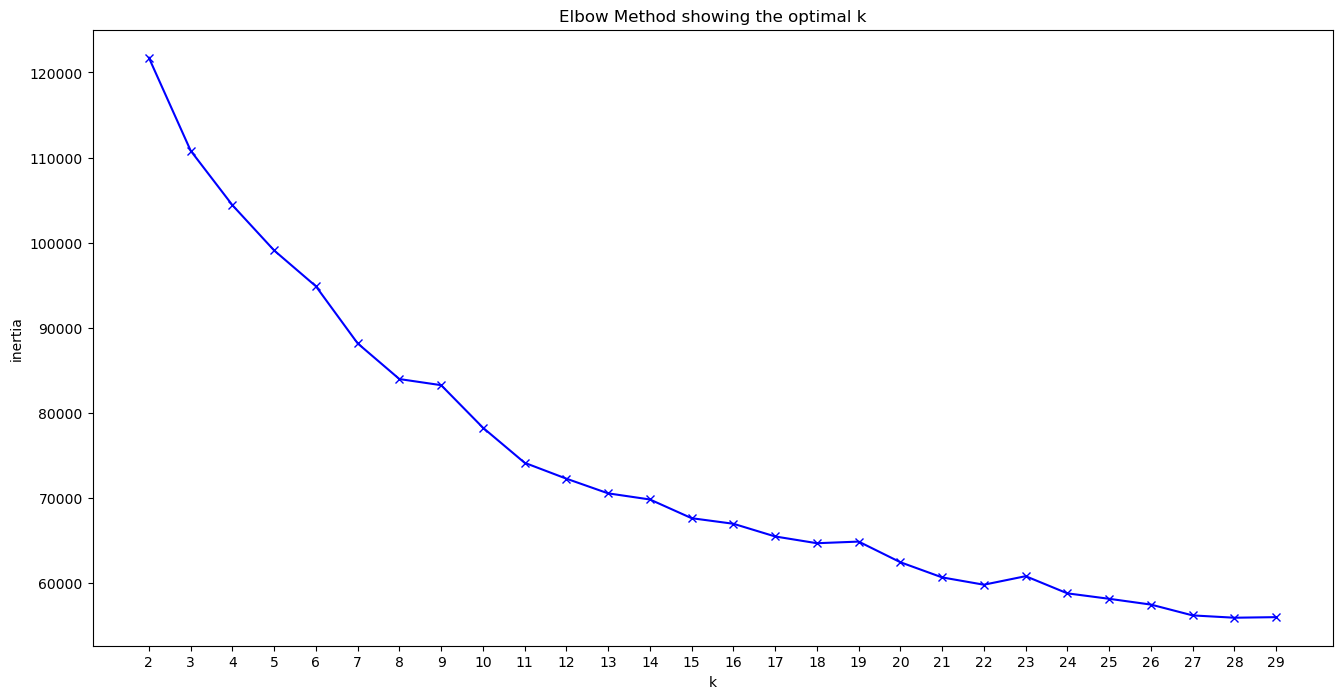

In [54]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

plt.show()


In [55]:
K = range(2, 30)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(playlist_scaled)
    silhouette.append(silhouette_score(X=playlist_scaled, labels=kmeans.predict(playlist_scaled)))

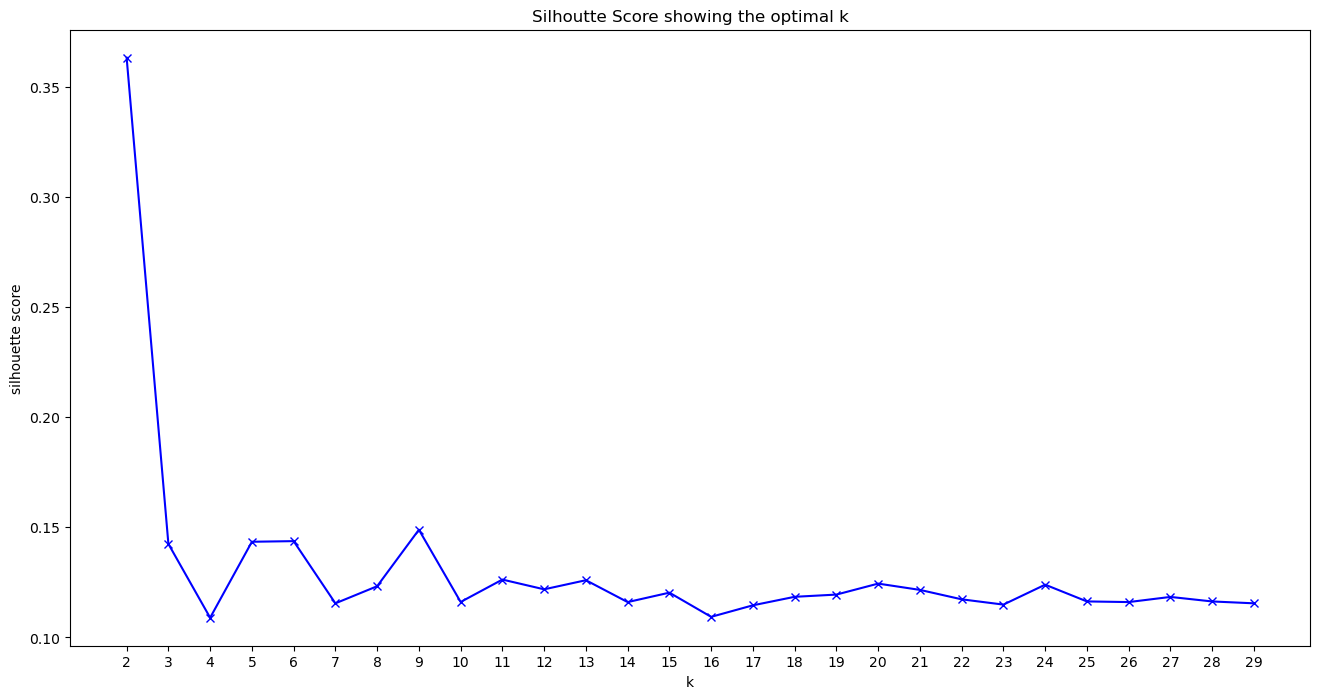

In [56]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhoutte Score showing the optimal k')

plt.show()

In [57]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(playlist_scaled)
clusters = kmeans.predict(playlist_scaled)

In [58]:
pd.Series(clusters).value_counts()

6    2232
8    1653
2    1641
5    1437
0    1140
4    1133
3     825
7     742
1     619
9     427
Name: count, dtype: int64

In [59]:
audio_ft["cluster"] = clusters
audio_ft

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.750,0.7330,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.8440,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,9
1,0.815,0.5820,5,-4.500,0,0.0532,0.0365,0.000001,0.1380,0.6710,123.030,audio_features,6Qb7YsAqH4wWFUMbGsCpap,spotify:track:6Qb7YsAqH4wWFUMbGsCpap,https://api.spotify.com/v1/tracks/6Qb7YsAqH4wW...,https://api.spotify.com/v1/audio-analysis/6Qb7...,209488,4,6
2,0.788,0.7580,1,-6.513,1,0.0505,0.1980,0.000085,0.1040,0.8230,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4,2
3,0.561,0.6040,9,-4.409,1,0.0337,0.1990,0.000019,0.1040,0.2420,159.920,audio_features,17phhZDn6oGtzMe56NuWvj,spotify:track:17phhZDn6oGtzMe56NuWvj,https://api.spotify.com/v1/tracks/17phhZDn6oGt...,https://api.spotify.com/v1/audio-analysis/17ph...,210689,3,5
4,0.559,0.5510,5,-7.231,1,0.1320,0.1410,0.000000,0.1100,0.3920,143.008,audio_features,4iZ4pt7kvcaH6Yo8UoZ4s2,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,0.388,0.1810,2,-18.788,1,0.0408,0.8810,0.177000,0.3300,0.5020,75.943,audio_features,0Nd19JzDaYNaa78Cvoo4A0,spotify:track:0Nd19JzDaYNaa78Cvoo4A0,https://api.spotify.com/v1/tracks/0Nd19JzDaYNa...,https://api.spotify.com/v1/audio-analysis/0Nd1...,405707,5,3
11845,0.306,0.0210,9,-21.621,1,0.0366,0.9780,0.718000,0.1130,0.1080,92.162,audio_features,6NXGfvlzfwoO44etLpbuAf,spotify:track:6NXGfvlzfwoO44etLpbuAf,https://api.spotify.com/v1/tracks/6NXGfvlzfwoO...,https://api.spotify.com/v1/audio-analysis/6NXG...,553547,3,9
11846,0.157,0.0454,5,-23.924,1,0.0374,0.9660,0.918000,0.1050,0.0497,79.182,audio_features,2QQWmnoVPjEvsUTVSs84li,spotify:track:2QQWmnoVPjEvsUTVSs84li,https://api.spotify.com/v1/tracks/2QQWmnoVPjEv...,https://api.spotify.com/v1/audio-analysis/2QQW...,623373,3,3
11847,0.315,0.0414,5,-23.688,1,0.0444,0.9160,0.257000,0.0868,0.1090,83.956,audio_features,0qGgNiLCG0YsCpHjle4SSO,spotify:track:0qGgNiLCG0YsCpHjle4SSO,https://api.spotify.com/v1/tracks/0qGgNiLCG0Ys...,https://api.spotify.com/v1/audio-analysis/0qGg...,664533,4,3


In [89]:
df_clusters = pd.merge(left=df_w_audio_ft,
                        right=audio_ft,
                        how='inner',
                        left_on='song_id',
                        right_on='id')


In [90]:
df_clusters.to_csv("playlist_with_clusters.csv", index=False)

In [91]:
df_clusters.drop_duplicates()

,song_name,name,song_id,popularity,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster_y
0,greedy,Tate McRae,3rUGC1vUpkDG9CZFHMur1t,100.0,0.750,0.7330,6,-3.180,0,0.0319,...,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,9
1,Training Season,Dua Lipa,6Qb7YsAqH4wWFUMbGsCpap,87.0,0.815,0.5820,5,-4.500,0,0.0532,...,0.671,123.030,audio_features,6Qb7YsAqH4wWFUMbGsCpap,spotify:track:6Qb7YsAqH4wWFUMbGsCpap,https://api.spotify.com/v1/tracks/6Qb7YsAqH4wW...,https://api.spotify.com/v1/audio-analysis/6Qb7...,209488,4,6
2,"yes, and?",Ariana Grande,7gaA3wERFkFkgivjwbSvkG,97.0,0.788,0.7580,1,-6.513,1,0.0505,...,0.823,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4,2
3,Lose Control,Teddy Swims,17phhZDn6oGtzMe56NuWvj,94.0,0.561,0.6040,9,-4.409,1,0.0337,...,0.242,159.920,audio_features,17phhZDn6oGtzMe56NuWvj,spotify:track:17phhZDn6oGtzMe56NuWvj,https://api.spotify.com/v1/tracks/17phhZDn6oGt...,https://api.spotify.com/v1/audio-analysis/17ph...,210689,3,5
4,Snooze,SZA,4iZ4pt7kvcaH6Yo8UoZ4s2,94.0,0.559,0.5510,5,-7.231,1,0.1320,...,0.392,143.008,audio_features,4iZ4pt7kvcaH6Yo8UoZ4s2,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22373,"String Quartet No. 7 In F Major, Op. 59 No. 1:...",Ludwig van Beethoven,0qGgNiLCG0YsCpHjle4SSO,30.0,0.315,0.0414,5,-23.688,1,0.0444,...,0.109,83.956,audio_features,0qGgNiLCG0YsCpHjle4SSO,spotify:track:0qGgNiLCG0YsCpHjle4SSO,https://api.spotify.com/v1/tracks/0qGgNiLCG0Ys...,https://api.spotify.com/v1/audio-analysis/0qGg...,664533,4,3
22374,"String Quartet No. 7 In F Major, Op. 59 No. 1:...",Tokyo String Quartet,0qGgNiLCG0YsCpHjle4SSO,30.0,0.315,0.0414,5,-23.688,1,0.0444,...,0.109,83.956,audio_features,0qGgNiLCG0YsCpHjle4SSO,spotify:track:0qGgNiLCG0YsCpHjle4SSO,https://api.spotify.com/v1/tracks/0qGgNiLCG0Ys...,https://api.spotify.com/v1/audio-analysis/0qGg...,664533,4,3
22375,"Adelaide, Op. 46",Ludwig van Beethoven,1gLNWiPPDeEy0x3bMCJzTH,29.0,0.367,0.0824,7,-23.709,1,0.0445,...,0.156,127.819,audio_features,1gLNWiPPDeEy0x3bMCJzTH,spotify:track:1gLNWiPPDeEy0x3bMCJzTH,https://api.spotify.com/v1/tracks/1gLNWiPPDeEy...,https://api.spotify.com/v1/audio-analysis/1gLN...,329827,4,3
22376,"Adelaide, Op. 46",Matthias Goerne,1gLNWiPPDeEy0x3bMCJzTH,29.0,0.367,0.0824,7,-23.709,1,0.0445,...,0.156,127.819,audio_features,1gLNWiPPDeEy0x3bMCJzTH,spotify:track:1gLNWiPPDeEy0x3bMCJzTH,https://api.spotify.com/v1/tracks/1gLNWiPPDeEy...,https://api.spotify.com/v1/audio-analysis/1gLN...,329827,4,3


In [92]:
import numpy as np

# Initialize an empty dictionary to store unique combinations of other columns as keys
# and corresponding lists of unique names as values
names_dict = {}

# Iterate over the DataFrame rows
for index, row in df_clusters.iterrows():
    # Create a tuple of values for all columns except 'name'
    key = tuple(row.drop('name'))
    
    # Get the name from the row
    name = str(row['name'])  # Convert to string to handle NaN values
    
    # If the key already exists in the dictionary
    if key in names_dict:
        # Check if the name is not already in the list associated with the key
        if name not in names_dict[key]:
            # Append the name to the list of names
            names_dict[key].append(name)
    # If the key does not exist in the dictionary, create a new entry
    else:
        names_dict[key] = [name]

# Convert the dictionary into a list of dictionaries
data = [{'artists': ", ".join(names), **dict(zip(df_clusters.columns.drop('name'), key))} for key, names in names_dict.items()]

# Convert the list of dictionaries into a DataFrame
df_grouped = pd.DataFrame(data)


In [93]:
display(df_grouped)

,artists,song_name,song_id,popularity,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster_y
0,Tate McRae,greedy,3rUGC1vUpkDG9CZFHMur1t,100.0,0.750,0.7330,6,-3.180,0,0.0319,...,0.8440,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,9
1,Dua Lipa,Training Season,6Qb7YsAqH4wWFUMbGsCpap,87.0,0.815,0.5820,5,-4.500,0,0.0532,...,0.6710,123.030,audio_features,6Qb7YsAqH4wWFUMbGsCpap,spotify:track:6Qb7YsAqH4wWFUMbGsCpap,https://api.spotify.com/v1/tracks/6Qb7YsAqH4wW...,https://api.spotify.com/v1/audio-analysis/6Qb7...,209488,4,6
2,Ariana Grande,"yes, and?",7gaA3wERFkFkgivjwbSvkG,97.0,0.788,0.7580,1,-6.513,1,0.0505,...,0.8230,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4,2
3,Teddy Swims,Lose Control,17phhZDn6oGtzMe56NuWvj,94.0,0.561,0.6040,9,-4.409,1,0.0337,...,0.2420,159.920,audio_features,17phhZDn6oGtzMe56NuWvj,spotify:track:17phhZDn6oGtzMe56NuWvj,https://api.spotify.com/v1/tracks/17phhZDn6oGt...,https://api.spotify.com/v1/audio-analysis/17ph...,210689,3,5
4,SZA,Snooze,4iZ4pt7kvcaH6Yo8UoZ4s2,94.0,0.559,0.5510,5,-7.231,1,0.1320,...,0.3920,143.008,audio_features,4iZ4pt7kvcaH6Yo8UoZ4s2,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,"Ludwig van Beethoven, Kuss Quartet","String Quartet No. 3, Op. 18: IV. Presto - Live",0Nd19JzDaYNaa78Cvoo4A0,29.0,0.388,0.1810,2,-18.788,1,0.0408,...,0.5020,75.943,audio_features,0Nd19JzDaYNaa78Cvoo4A0,spotify:track:0Nd19JzDaYNaa78Cvoo4A0,https://api.spotify.com/v1/tracks/0Nd19JzDaYNa...,https://api.spotify.com/v1/audio-analysis/0Nd1...,405707,5,3
11845,"Ludwig van Beethoven, Gewandhausorchester, Ric...","Symphony No. 2 in D Major, Op. 36: II. Larghetto",6NXGfvlzfwoO44etLpbuAf,23.0,0.306,0.0210,9,-21.621,1,0.0366,...,0.1080,92.162,audio_features,6NXGfvlzfwoO44etLpbuAf,spotify:track:6NXGfvlzfwoO44etLpbuAf,https://api.spotify.com/v1/tracks/6NXGfvlzfwoO...,https://api.spotify.com/v1/audio-analysis/6NXG...,553547,3,9
11846,"Ludwig van Beethoven, Philadelphia Orchestra, ...","Beethoven: Symphony No. 6 in F Major, Op. 68 ""...",2QQWmnoVPjEvsUTVSs84li,38.0,0.157,0.0454,5,-23.924,1,0.0374,...,0.0497,79.182,audio_features,2QQWmnoVPjEvsUTVSs84li,spotify:track:2QQWmnoVPjEvsUTVSs84li,https://api.spotify.com/v1/tracks/2QQWmnoVPjEv...,https://api.spotify.com/v1/audio-analysis/2QQW...,623373,3,3
11847,"Ludwig van Beethoven, Tokyo String Quartet","String Quartet No. 7 In F Major, Op. 59 No. 1:...",0qGgNiLCG0YsCpHjle4SSO,30.0,0.315,0.0414,5,-23.688,1,0.0444,...,0.1090,83.956,audio_features,0qGgNiLCG0YsCpHjle4SSO,spotify:track:0qGgNiLCG0YsCpHjle4SSO,https://api.spotify.com/v1/tracks/0qGgNiLCG0Ys...,https://api.spotify.com/v1/audio-analysis/0qGg...,664533,4,3
